Pixel value closest to 0 will be more darker(in positive region).Means negative values will represent darker values.


Dimensions of given matrix - coressponding filter matrix dimensions + 1(gives you the dimension of the final matrix)

In [32]:
import os


In [33]:
train_dir = os.path.join('train(cd)')
test_dir = os.path.join('test(cd)')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')

test_cats = os.path.join(test_dir, 'cats')
test_dogs = os.path.join(test_dir, 'dogs')

In [34]:
train_cat_fnames = os.listdir(train_cats)
train_dog_fnames = os.listdir(train_dogs)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg', 'cat_103.jpg', 'cat_104.jpg', 'cat_11.jpg', 'cat_111.jpg', 'cat_12.jpg', 'cat_120.jpg']
['dog_0.jpg', 'dog_10.jpg', 'dog_100.jpg', 'dog_102.jpg', 'dog_103.jpg', 'dog_106.jpg', 'dog_109.jpg', 'dog_11.jpg', 'dog_110.jpg', 'dog_113.jpg']


In [35]:
print('total training cat images: ', len(os.listdir(train_cats)))
print('total training dogs images: ', len(os.listdir(train_dogs)))

print('total testing cat images: ', len(os.listdir(test_cats)))
print('total testing dog images: ', len(os.listdir(test_dogs)))

total training cat images:  279
total training dogs images:  278
total testing cat images:  70
total testing dog images:  70


In [36]:
import tensorflow as tf

In [37]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator( rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode= 'binary',
                                                   target_size=(150,150))


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                 class_mode='binary',
                                                 target_size=(150,150))


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


verbose is presentation of epochs like if 2 it will show only essential paramters and if 0 it will show none whereas if 1 then it will show wholw animation

In [40]:
history = model.fit(train_generator,
                   validation_data=test_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 12s - 117ms/step - accuracy: 0.4865 - loss: 0.9916 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/15
100/100 - 10s - 97ms/step - accuracy: 0.5368 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 3/15
100/100 - 9s - 91ms/step - accuracy: 0.5619 - loss: 0.7142 - val_accuracy: 0.5571 - val_loss: 0.6742
Epoch 4/15
100/100 - 10s - 96ms/step - accuracy: 0.6355 - loss: 0.6470 - val_accuracy: 0.5857 - val_loss: 0.6698
Epoch 5/15
100/100 - 9s - 94ms/step - accuracy: 0.6715 - loss: 0.5986 - val_accuracy: 0.6214 - val_loss: 0.6873
Epoch 6/15
100/100 - 9s - 92ms/step - accuracy: 0.6768 - loss: 0.5940 - val_accuracy: 0.6000 - val_loss: 0.6551
Epoch 7/15
100/100 - 10s - 96ms/step - accuracy: 0.7415 - loss: 0.5344 - val_accuracy: 0.6214 - val_loss: 0.7030
Epoch 8/15
100/100 - 9s - 91ms/step - accuracy: 0.7828 - loss: 0.4790 - val_accuracy: 0.5857 - val_loss: 0.8594
Epoch 9/15
100/100 - 10s - 99ms/step - accuracy: 0.8151 - loss: 0.4098 - val_accuracy: 0.6357 - val

In [45]:
print(model.input_shape)  


(None, 150, 150, 3)


<Figure size 640x480 with 0 Axes>

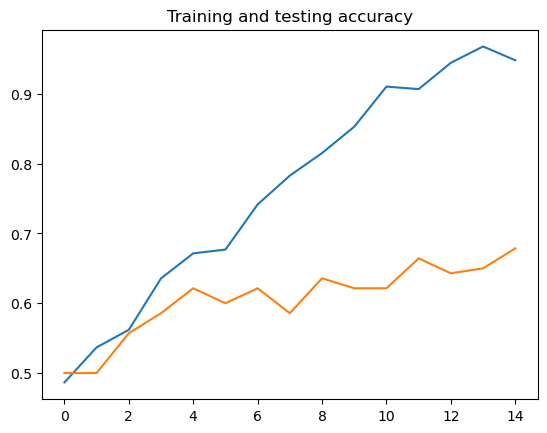

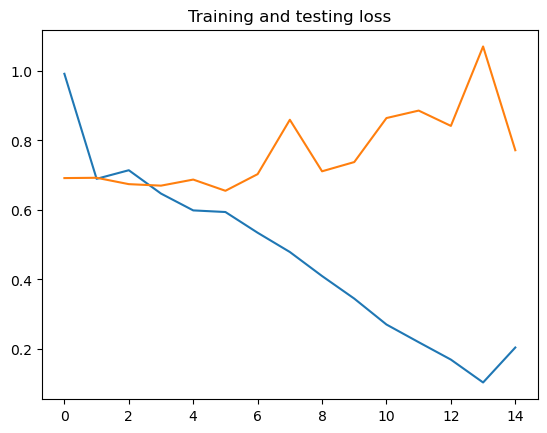

<Figure size 640x480 with 0 Axes>

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and testing accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and testing loss')
plt.figure()

# Separate model testing for any image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(img_path, target_size=(150, 150)):
    """
    Load and preprocess the image to the required input size.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  
    return img_array


img_path = 'path.jpeg' 


img_array = load_and_prepare_image(img_path)


predictions = model.predict(img_array)


if predictions[0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")